---
title: "K Mean implementation from scratch with Python"
date: "2025-01-18"
author: Anushka Dhiman
categories: [Machine Learning]
---
___

## What is K-means clustering?

K-means clustering is a popular unsupervised machine learning algorithm used for grouping similar data points into k - clusters. 

The goal here is to partition a given dataset into k (predefined) clusters.

The k-means algorithm works by first randomly initializing k cluster centers, one for each cluster. Each data point in the dataset is then assigned to the nearest cluster center based on their distance. The distance metric used is typically Euclidean distance, but other distance measures such as Manhattan distance or cosine similarity can also be used.

After all the data points have been assigned to a cluster, the algorithm calculates the new mean for each cluster by taking the average of all the data points assigned to that cluster. These new means become the new cluster centers. The algorithm then repeats the assignment and mean calculation steps until the cluster assignments no longer change or until a maximum number of iterations is reached.

The final output of the k-means algorithm is a set of k clusters, where each cluster contains the data points that are most similar to each other based on the distance metric used. The algorithm is commonly used in various fields such as image segmentation, market segmentation, and customer profiling.

[<img src="kmean.png" alt="kmean" style="display: block; margin: auto; " width="700"/>](../insights/StatisticsandProbability/MachineLearning/kmean.png) 


## Code Implementation 
Here's an implementation of k-means clustering algorithm in Python from scratch:

**Key Concepts:**
- Centroids: The central point of each cluster.
- Euclidean Distance: The distance measure used to calculate the proximity of data points to the centroids.
- Convergence: The process of the centroids stabilizing, indicating that the clustering has been achieved.

In [1]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]

        # Iterative Process: The algorithm runs for a maximum number of iterations (max_iterations)
        for i in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            cluster_assignments = []
            for j in range(len(X)):
                distances = np.linalg.norm(X[j] - self.centroids, axis=1) # compute the Euclidean distance to all centroids and assign the data point to the centroid that is closest.
                cluster_assignments.append(np.argmin(distances)) # 
            
            # Update centroids
            for k in range(self.k):
                cluster_data_points = X[np.where(np.array(cluster_assignments) == k)]
                if len(cluster_data_points) > 0:
                    self.centroids[k] = np.mean(cluster_data_points, axis=0)
            
            # Check for convergence
            # If the centroids stop changing (i.e., the current centroids are equal to the previous centroids), the algorithm terminates early as it has converged. 
            if i > 0 and np.array_equal(self.centroids, previous_centroids):
                break
            
            # Update previous centroids
            previous_centroids = np.copy(self.centroids)
        
        # Store the final cluster assignments
        self.cluster_assignments = cluster_assignments
    
    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for j in range(len(X)):
            distances = np.linalg.norm(X[j] - self.centroids, axis=1) # Compute the distance from each point to the centroids using Euclidean distance
            cluster_assignments.append(np.argmin(distances)) # Assign each new data point to the closest centroid
        
        return cluster_assignments

Let's test our code,

Here is an example of how you would use the KMeans class to fit the model and make predictions:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data (2D points)
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# Initialize the KMeans class with k=2 clusters
kmeans = KMeans(k=2)

# Fit the model to the data
kmeans.fit(X)

# Print the final centroids
print("Final Centroids:\n", kmeans.centroids)

# Make predictions on the same data
predictions = kmeans.predict(X)
print("Cluster Assignments:", predictions)

Final Centroids:
 [[2 3]
 [2 0]]
Cluster Assignments: [0, 0, 1, 0, 0, 1]


## Visualization

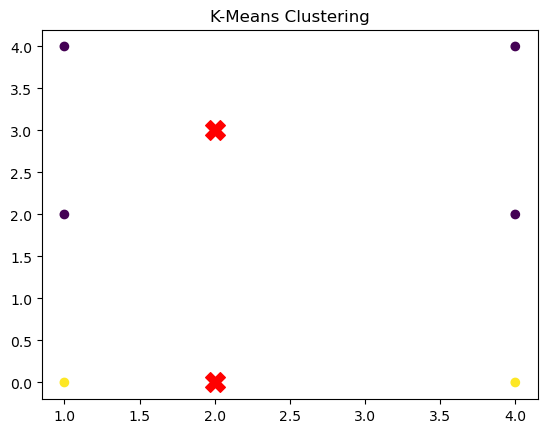

In [4]:


# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X')  # Plot centroids
plt.title('K-Means Clustering')
plt.show()


Let's break down this example,

- Data: The array X contains six 2D data points. These are the points that we want to cluster into two groups.
- Model Initialization: We initialize the KMeans object with k=2 (meaning we want two clusters).
- Fitting: We then fit the model to the data with the fit method, which will iteratively find two clusters and update the centroids.
- Predictions: The predict method is used to assign each data point to one of the two clusters.
- Visualization: We plot the data points and the final centroids (shown as red 'X' markers) to visually confirm that the KMeans algorithm has correctly clustered the data.

## K-Mean Algorithm Optimization

Here are some ways to optimize the k-means clustering algorithm:

Random initialization of centroids: Instead of initializing the centroids using the first k data points, we can randomly initialize them to improve the convergence of the algorithm. This can be done by selecting k random data points from the input dataset as the initial centroids.

Early stopping: We can stop the k-means algorithm if the cluster assignments and centroids do not change after a certain number of iterations. This helps to avoid unnecessary computation.

Here's an optimized version of the k-means clustering algorithm that implements these optimizations:

In [5]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        # Iterate until convergence or maximum number of iterations is reached
        for i in range(self.max_iters):
            # Assign each data point to the closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            cluster_assignments = np.argmin(distances, axis=1)
            
            # Update the centroids based on the new cluster assignments
            new_centroids = np.array([np.mean(X[np.where(cluster_assignments == j)], axis=0) 
                                      for j in range(self.k)])
            
            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
                
            self.centroids = new_centroids
    
    def predict(self, X):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)
        
        return cluster_assignments


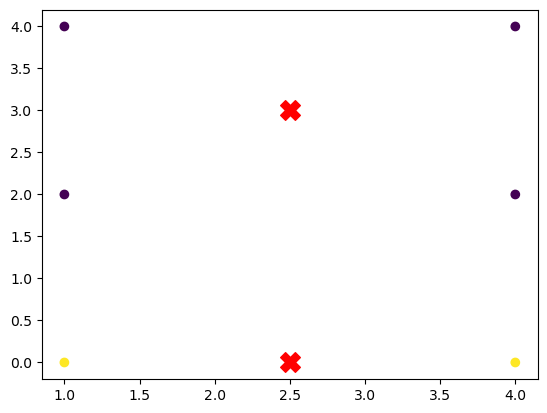

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (2D)
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# Initialize KMeans with 2 clusters
kmeans = KMeans(k=2)

# Train the model
kmeans.fit(X)

# Get the cluster assignments for the data points
cluster_assignments = kmeans.predict(X)

# Plot the data points, colored by their cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')

# Plot the centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200)

plt.show()


In the example above:

- Data points are plotted with colors corresponding to their assigned clusters.
- Centroids are marked with red "X" symbols, showing the final positions of the centroids after training.